In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import sys

In [2]:
from pathlib import Path
sys.path.insert(0,os.path.abspath('../'))
sys.path.insert(0,os.path.abspath('../utilities'))

In [3]:
from utilities.resnet import lambda_resnet50

In [4]:
from utilities.utils import *

## Lambda Resnet 50 on CIFAR-100

In [5]:
SEED=566
torch.manual_seed(SEED)
np.random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

In [6]:
model = lambda_resnet50(num_classes=100)
PRETRAINED_MODEL_PATH=os.path.join('/home/abc586/courseWork/introtodlsystem/finalProject/visualizing-vision-models/pretrained-models','lambda_resnet50_seed_566_epochs_100.pth')
model.load_state_dict(torch.load(PRETRAINED_MODEL_PATH))

<All keys matched successfully>

In [7]:
LABEL='lambdar50-CIFAR100'
TYPE='PRETRAINED'

## Getting the hooks for each layers

In [8]:
hookLayersActivationDict = {}
activationDict = {}

In [9]:
modelNamedModules = dict(model.named_modules())

In [10]:
hookLayers = []
for i in modelNamedModules.keys():
    if i.__contains__("bn") or i.__contains__("relu") or i.__contains__("avgpool") or i.__contains__("fc") or i.__contains__("maxpool") :
        hookLayers.append(i)

In [11]:
for layer in hookLayers:
    h = model.get_submodule(layer).register_forward_hook(getActivation(layer,hookLayersActivationDict))

## CIFAR 100

In [12]:
TRAIN_BATCH_SIZE = 256
TEST_BATCH_SIZE = 256
NUM_WORKERS = 0

normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                     std=[0.2675, 0.2565, 0.2761])

train_dataset = datasets.CIFAR100(root='./data', train=True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,
        batch_size=TRAIN_BATCH_SIZE, shuffle=True,
        num_workers=NUM_WORKERS, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        datasets.CIFAR100(root='./data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=TEST_BATCH_SIZE, shuffle=False,
        num_workers=NUM_WORKERS, pin_memory=True)

Files already downloaded and verified


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
model = model.to(device)
valid_acc,activationDict = evaluate(model,device,val_loader,hookLayers,hookLayersActivationDict)

Iteration:   0%|          | 0/40 [00:01<?, ?it/s]


## HSIC calculation and plots

In [15]:
col1,col2,hsicScoreList = getLayerWiseOutputCorrelation(hookLayers,hookLayers,activationDict,activationDict)

Layer 1:bn1, HSIC score:nan
Layer 1:bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer1.1.bn2,

Layer 1:bn1, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0027178905438631773
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:avgpool, HSIC score:0.003833902534097433
Cross HSIC score:nan
Denom:nan
Layer 1:bn1, HSIC score:nan
Layer 1:fc, HSIC score:0.004309374839067459
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer1.0.relu1, HS

Layer 1:relu, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan
Layer 1:relu, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.00271789054386

Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:0.0035029212012887
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.bn1, HSIC score:0.003911437466740608
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.bn2, HSIC score:0.00390252866782248
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.relu2, HSIC score:0.00390252866782248
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.3.bn2, HSIC score:0.003920750226825476
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.3.relu2, HSIC score:0.003920750226825476
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.3.relu3, HSIC score:0.0036875170189887285
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.4.bn1, HSIC score:0.003908937331289053
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.4.bn2, HSIC score:0.0038863560184836388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Layer 1:layer3.4.relu2, HSIC score:0.0038863560184836388
Cross HSIC score:0.0
Denom:0.0
Layer 1:laye

Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.2.bn2, HSIC score:0.030100611969828606
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.2.relu2, HSIC score:0.030100611969828606
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.2.relu3, HSIC score:0.0036742996890097857
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.3.bn1, HSIC score:0.0039163511246442795
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Layer 1:layer3.3.bn2, HSIC score:0.003920750226825476
Cross HSIC score:0.0
Denom:

Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:6.749711513519287
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.1.relu3, HSIC score:1.5497061967018055e-10
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:nan
Den

Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:0.0039126076735556126
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0027178905438631773
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:avgpool, HSIC score:0.003833902534097433
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Layer 1:fc, HSIC score:0.004309374839067459
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score

Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.4.bn2, HSIC score:0.0038863560184836388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.4.relu2, HSIC score:0.0038863560184836388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.4.relu3, HSIC score:0.0035029212012887
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.5.bn1, HSIC score:0.003911437466740608
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Layer 1:layer3.5.bn2, HSIC score:0.00390252866782248
Cross HSIC score:0.0
Denom:0.0
Lay

Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.47508129477500916
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0038715030532330275
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:laye

Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSI

Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0027178905438631773
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:avgpool, HSIC score:0.003833902534097433
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Layer 1:fc, HSIC score:0.004309374839067459
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC sco

Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1

Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Cross HSIC score

Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.0.relu3, HSIC score:0.0037107712123543024
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.bn1, HSIC score:0.003920781891793013
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.bn2, HSIC score:0.017025884240865707
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.relu2, HSIC score:0.017025884240865707
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.1.relu3, HSIC score:0.003669820027425885
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.0
Layer 1:layer3.2.bn1, HSIC score:0.015854736790060997
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.

Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.bn3, HSIC score:6.749711513519287
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:6.749711513519287
Cross HSIC score:0.0
D

Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.bn1, HSIC score:0.003909220919013023
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.relu1, HSIC score:0.003909220919013023
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.relu2, HSIC score:0.003913054242730141
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Cross HSIC score:0.0
Denom:0.

Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:0.003920750226825476
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:0.003920750226825476
Cross HSIC score:nan
Denom:nan
Layer 1:laye

Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer3.0.conv2.avgpool, HSIC score:1.5877552636480717e+18
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.00389142450876534
Cross HSIC score

Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:

Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:0.003920750226825476
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:0.003920750226825476
Cross HSIC score:nan
Denom:

Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.2.relu3, HSIC score:1.3719425469204609e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.47508129477500916
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0038715030532330275
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:0.0
Layer 1:l

Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:0.

Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer3.5.bn2, HSIC score:0.00390252866782248
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer3.5.relu2, HSIC score:0.00390252866782248
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0033932768274098635
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:0.0
D

Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.conv2.avgpool, HSIC score:1.5877552636480717e+18
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.00389142450876534
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:0.0037107712123543024
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.003920781891793013
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Cross HSIC score:nan
Denom:nan
Lay

Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSI

Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:

Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:0.0037107712123543024
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.003920781891793013
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:0.017025884240865707
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:0.017025884240865707
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Layer 1:layer3.1.relu

Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:nan


Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC 

Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:0.003909220919013023
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:0.003913054242730141
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:0.003917270805686712
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Cross HSIC score:nan
Denom:nan

Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:relu, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC 

Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Lay

Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:0.003920750226825476
Cross HSIC score:nan
Denom:

Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0038715030532330275
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:6.622239900999069e-17
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:0.0031159233767539263
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer3.0.conv2.avgpool, HSIC score:1.5877552636480717e+18
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Cross HSIC score:nan
Denom:nan
L

Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:6.749711513519287
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:6.749711513519287
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:1.5497061967018055e-10
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC scor

Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:1.5497061967018055e-10
Layer 1:layer1.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


/home/abc586/courseWork/introtodlsystem/finalProject/visualizing-vision-models/utilities/utils.py:104: RuntimeWarning: invalid value encountered in double_scalars
  finalScore = hsicCross/denom


Layer 1:layer2.2.bn1, HSIC score:inf
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn1, HSIC score:inf
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer1.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer1.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer1.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:inf
Layer 1:layer

Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0033932768274098635
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.conv2.avgpool, HSIC score:0.003826580010354519
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:0.0039058937691152096
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Cross HSIC score:nan
Denom:nan
Lay

Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.1.relu3, HSIC score:0.003669820027425885
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.bn1, HSIC score:0.015854736790060997
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:0.030100611969828606
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:0.0036742996890097857
Cross HSIC score:nan
Denom:na

Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.0.conv2.avgpool, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:1.3719425469204609e-15
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.3.bn1, HSIC score:0.47508129477500916
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn1, HSIC score:0.47508129477500916
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.47508129477500916
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu1, HSIC sc

Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0038715030532330275
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn3, HSIC score:6.622239900999069e-17
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn3, H

Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:0.0031159233767539263
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu1, HSIC score:0.0031159233767539263
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.

Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.00389142450876534
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.00389142

Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:0.0037107712123543024
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:0.0037107712123543024
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.

Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.003920781891793013
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.re

Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:0.003669820027425885
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:0.

Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:0.015854736790060997
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.re

Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:0.0036742996890097857
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC 

Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:0.0039163511246442795
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:lay

Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:0.0036875170189887285
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC 

Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu1, HSIC score:0.003908937331289053
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.re

Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:0.0035029212012887

Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu1, HSIC score:0.003911437466740608
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.re

Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0033932768274098635
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC 

Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:0.003883365774527192
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.relu1, HSIC score:0.003883365774527192
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.relu1,

Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.bn2, HSIC score:0.0039058937691152096
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.bn2, HSIC 

Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:0.0038963165134191513
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.0.relu3, HSIC score:0.0038963165134191513
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.

Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn2, HSIC score:0.003913054242730141
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn2, HSIC score:0.

Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.003533549839630723
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.003533549839630723
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3,

Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn2, HSIC score:0.0039126076735556126
Layer 1:layer1.0.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn2, HSIC 

Layer 1:layer4.2.bn3, HSIC score:0.0027178905438631773
Layer 1:layer2.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0027178905438631773
Layer 1:layer2.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:relu, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:layer1.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:layer1.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:layer1.0.bn2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0027178905438631773
Layer 1:layer1.0.relu2, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.

In [16]:
import pandas as pd
import seaborn as sns

In [17]:
import matplotlib.ticker as ticker

In [18]:
hsicData = {
    'L1' : col1,
    'L2' : col2,
    'hsic':hsicScoreList
}

hsicDataFrame = pd.DataFrame(data=hsicData)
hsicDataFrame = hsicDataFrame.pivot("L1", "L2", "hsic")

/tmp/ipykernel_1810478/3750928071.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(LABEL+"_"+TYPE+'.pdf',fmt='pdf',bbox_inches='tight')


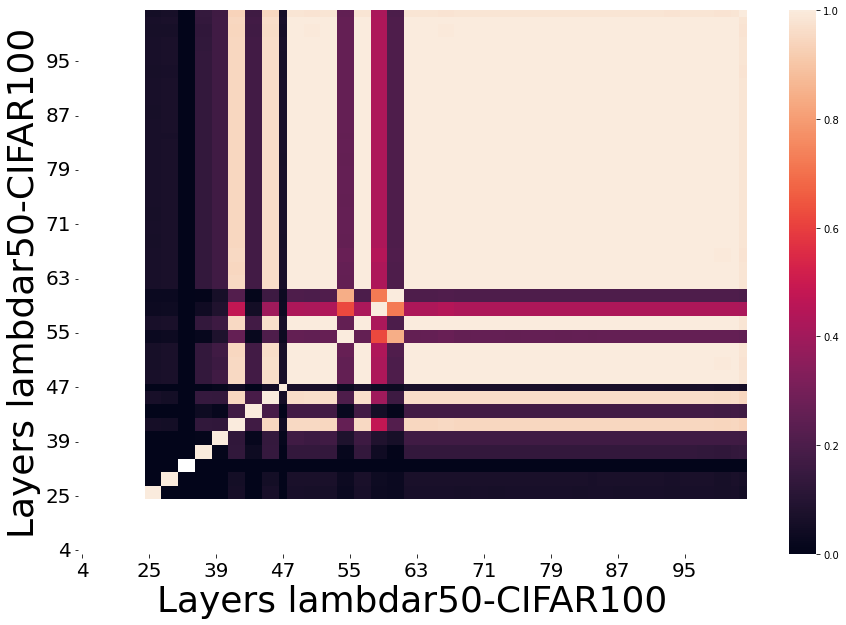

In [19]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(hsicDataFrame.T)
plt.xlabel("Layers "+LABEL,fontsize='36')
plt.ylabel("Layers "+LABEL,fontsize='36')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.invert_yaxis()
plt.savefig(LABEL+"_"+TYPE+'.pdf',fmt='pdf',bbox_inches='tight')